In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model=ChatGroq(model="llama-3.1-8b-instant")

In [4]:
class LLM(TypedDict):
    topic:str
    outline:str
    blog:str

In [5]:
def llm_outline(state:LLM)->LLM:
    topic=state['topic']
    prompt=f'Provide a summary on the topic: {topic}'
    result=model.invoke(prompt).content
    state['outline']=result

    return state


In [6]:
def llm_blog(state:LLM)->LLM:
    outline=state['outline']
    prompt=f'Provide a detailed explanation on the topic: {outline}'
    result=model.invoke(prompt).content
    state['blog']=result

    return state


In [7]:
graph=StateGraph(LLM)

In [8]:
# Add nodes:
graph.add_node('llm_outline',llm_outline)
graph.add_node('llm_blog',llm_blog)

# Add edge:
graph.add_edge(START,'llm_outline')
graph.add_edge('llm_outline','llm_blog')
graph.add_edge('llm_blog',END)

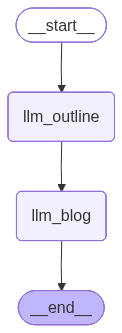

In [9]:
workflow=graph.compile()
workflow

In [10]:
initial_state={'topic':'Can you tell about the origin Indus Valley Civilization?'}
final_state=workflow.invoke(initial_state)

print(final_state['outline'])

The Indus Valley Civilization (IVC) is one of the oldest and most advanced civilizations in the history of human civilization. It originated in the Indus Valley region of modern-day Pakistan and northwestern India, specifically in the areas now occupied by the provinces of Sindh, Punjab, and Balochistan.

**Timeline:**
The IVC is believed to have flourished around 3300 BCE and continued until around 1300 BCE. This civilization is often divided into three phases:

1. **Early Harappan Phase (3300-2600 BCE):** This phase marks the beginning of the IVC, with the establishment of the first cities and the development of a sophisticated urban culture.
2. **Mature Harappan Phase (2600-1900 BCE):** During this phase, the IVC reached its peak, with the construction of elaborate cities, trade networks, and a complex system of governance.
3. **Late Harappan Phase (1900-1300 BCE):** This phase saw the decline of the IVC, with the abandonment of many cities and the eventual collapse of the civilizat

In [11]:
print(final_state['blog'])

**The Indus Valley Civilization (IVC): A Comprehensive Overview**

The Indus Valley Civilization (IVC) is one of the most enigmatic and fascinating civilizations in human history, with a rich and complex culture that thrived in the Indus Valley region of modern-day Pakistan and northwestern India. This civilization, which flourished around 3300 BCE to 1300 BCE, is often divided into three distinct phases: the Early Harappan Phase, the Mature Harappan Phase, and the Late Harappan Phase.

**Timeline:**

1. **Early Harappan Phase (3300-2600 BCE):** This phase marks the beginning of the IVC, with the establishment of the first cities and the development of a sophisticated urban culture. During this phase, the IVC began to take shape, with the emergence of the first cities, such as Harappa and Mohenjo-Daro.
2. **Mature Harappan Phase (2600-1900 BCE):** This phase saw the IVC reach its peak, with the construction of elaborate cities, trade networks, and a complex system of governance. The Ma

In [12]:
print(final_state['topic'])

Can you tell about the origin Indus Valley Civilization?
